### <b> PIP package to replicate data from Data Lake to GCP BQ

#### Import Datalake to Bigquery Libr.

In [1]:
import dl2bq
from dl2bq import BQConnect

##### <B> Have your credentials ready .. 

In [2]:
###You should have your project & credentials ready for migrating data from Data Lake to BQ
bq_dataset     = 'bigquery-public-data:hacker_news'    ## Your BQ Dataset if created else create one
bq_project     = 'igneous-study-316208'             ### This is Mandatory
bq_credentials = r'C:\Users\abc\Downloads\igneous-study-316208-d66aebfd83ea.json' ##Mandt

In [3]:
##Initialize BQ
bq =  BQConnect(bq_dataset,bq_project,bq_credentials)

In [4]:
bq_client, bq_ds = BQConnect.connect2bq(bq)

#### <b>Create DataSet

In [15]:
###Create new Dataset for your tables first.
lv_ab = BQConnect.create_dataset(bq_client,'HANADLNEW')

Creating DataSet.....
Created.. Thanks


#### <b> Connect to Data Lake and Load data into client

In [8]:
import pyodbc
import pandas as pd

In [9]:
##Have your select statement ready
sql = 'SELECT * from HOTEL.HOTEL'
cnxn = pyodbc.connect('DSN=HDLSA;UID=HDLADMIN;PWD=******')

In [10]:
df =  pd.read_sql(sql, cnxn)

#### <b> Data Preview

In [11]:
df.head()

,hno,name,address,city,state,zip
0,10,Congress,155 Beechwood St.,Seattle,WA,20005
1,11,Regency,477 17th Avenue,Seattle,WA,20037
2,12,Long Island,1499 Grove Street,Long Island,NY,11788
3,13,Empire State,65 Yellowstone Dr.,Albany,NY,12203
4,14,Midtown,12 Barnard St.,New York,NY,10019


##### <b> Create table

In [13]:
# bq_client.dataset

In [16]:
BQConnect.create_tab(bq_client, df, 'T02')

Started Creating table.....
igneous-study-316208.HANADLNEW.T02
Preparing Schema...
Ready.....
Table created Successfully igneous-study-316208.HANADLNEW.T02


'Created table igneous-study-316208.HANADLNEW.T02'

In [18]:
df.to_gbq('HANADL.T02',project_id=bq_client.project,if_exists='append')

1it [00:05,  5.70s/it]


#### See the output in BQ Space

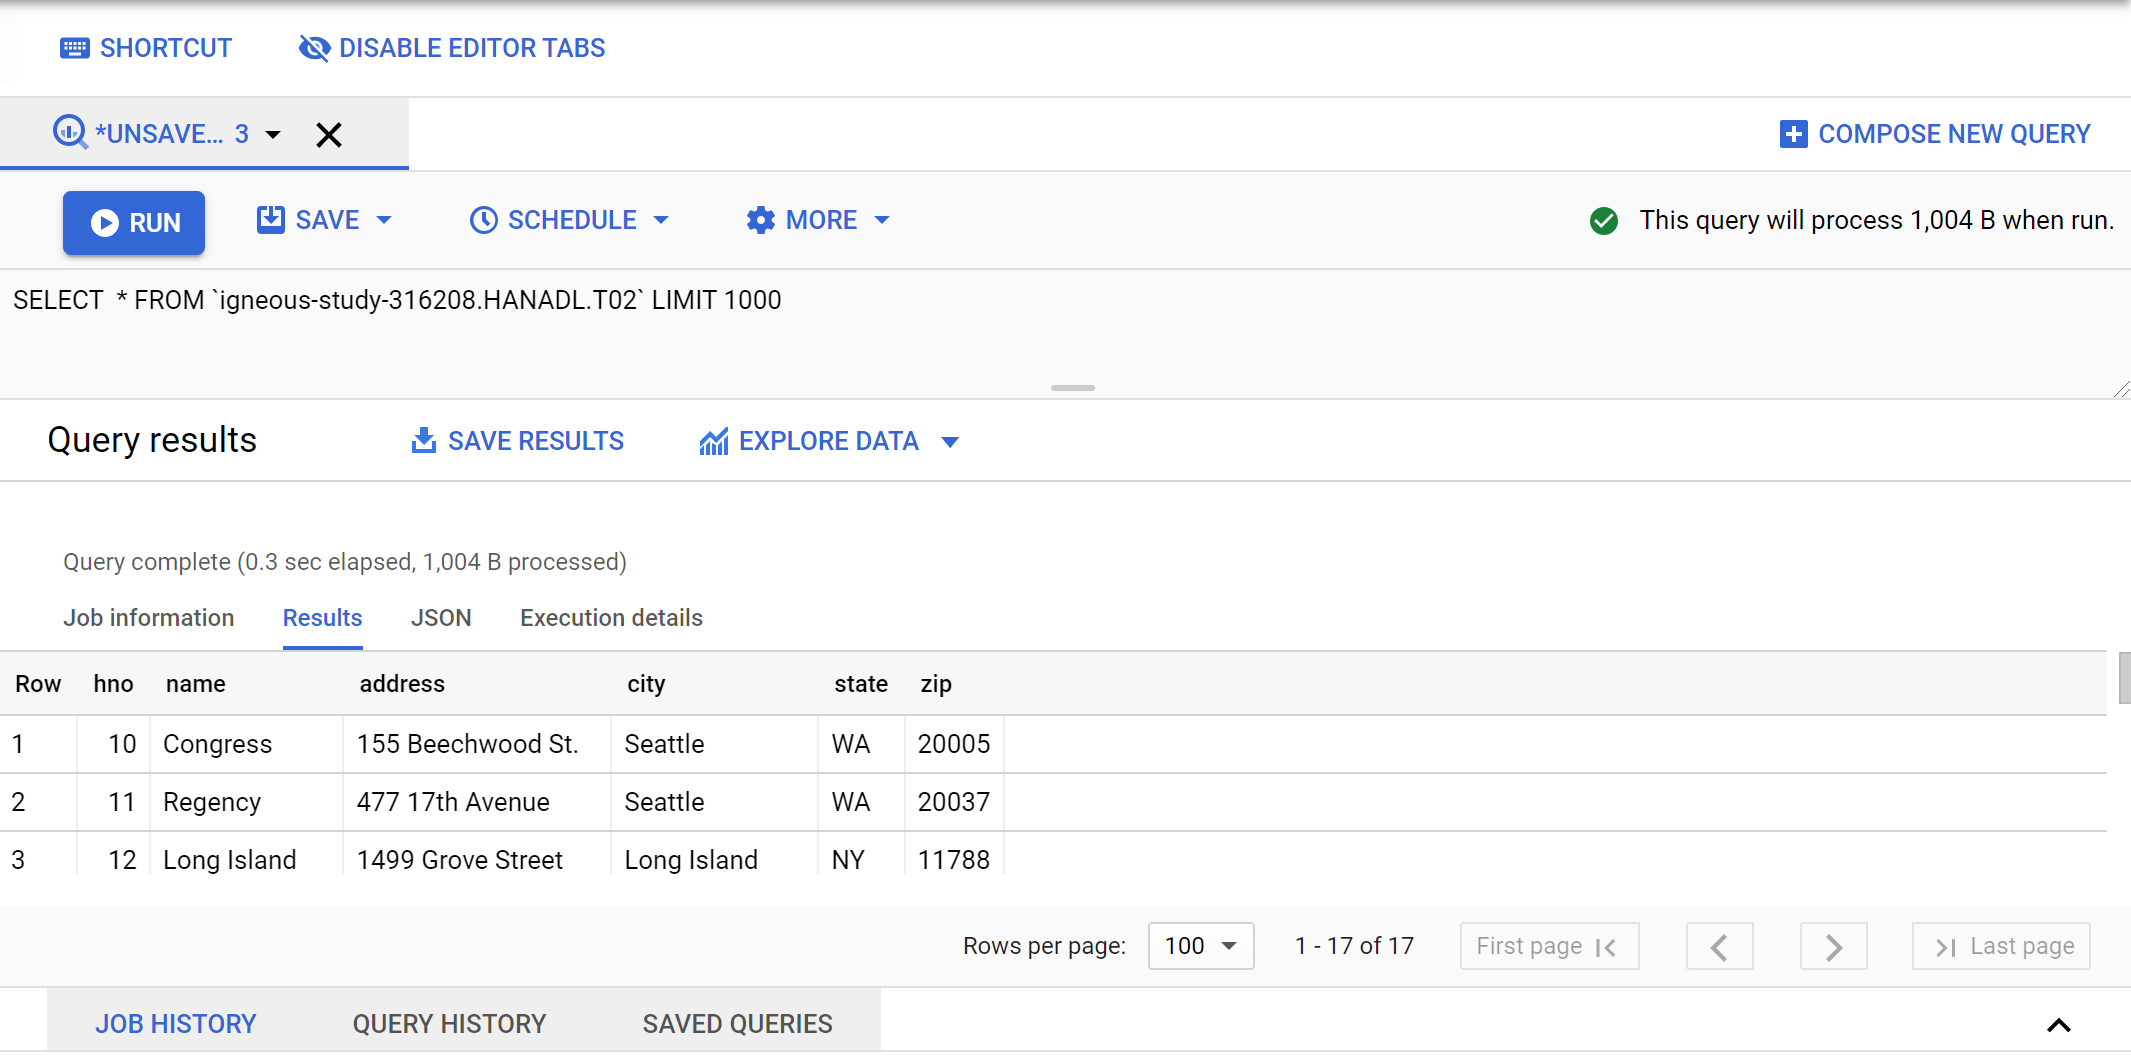

#### <B>Connect to DATA Lake Now and Import some data 

In [20]:
# for i in bq_client.list_datasets():
#     print(i.dataset_id)